Hub discovered: 
    16:41:D9:6F:80:E4: Pybricks Hub. 
Transmissions from Hub: 
    496
    366
    366
    678
    675
    667
    567
    621
    624
    334
    334
    198
    198
    170
    310
    491
    678
    594
    2000
    `   
    The program was sto
    pped (SystemExit).
    
Python script on PC was ended. 


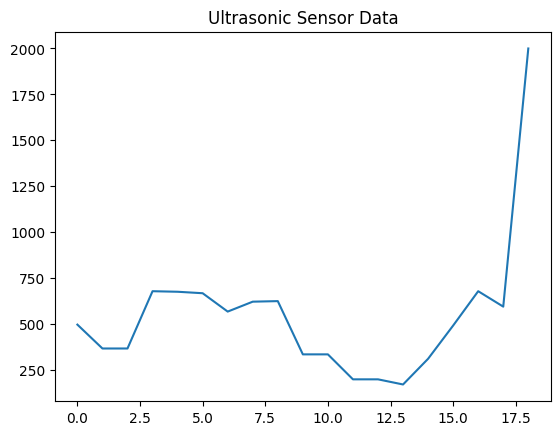

[496, 366, 366, 678, 675, 667, 567, 621, 624, 334, 334, 198, 198, 170, 310, 491, 678, 594, 2000]


In [1]:
import asyncio
from bleak import BleakScanner, BleakClient
import numpy as np
import matplotlib.pyplot as plt

PYBRICKS_COMMAND_EVENT_CHAR_UUID = "c5f50002-8280-46da-89f4-6d8051e4aeef" #BLE characteristic.  
HUB_NAME = "Pybricks Hub"

async def discover_hub():
        device = await BleakScanner.find_device_by_name(HUB_NAME)
        if device is None:
            print(f"Could not find hub with name: \n    {HUB_NAME}. ")
        else: 
            print(f'Hub discovered: \n    {device}. ')
        return device

def handle(_, data: bytearray, sensor_data: list): #Callback function when receiving data from hub. 
    if data == b'\x00\x00\x02\x00\x00\x00': 
        return
    if data == b'\x00 \x02\x00\x00\x00':
        return
    if data == b'\x00\x02\x00\x00\x00':
        return 
    if data == b'\x00@\x02\x00\x00\x00':
        return
    payload = str(data[1:], 'utf-8').strip()
    print(f'    {payload}')
    try: 
        sensor_data.append(int(payload))
    except: 
        pass
     
async def read_and_write(device): 
    async with BleakClient(device) as client:
        await client.start_notify(PYBRICKS_COMMAND_EVENT_CHAR_UUID, handle)
        await client.write_gatt_char(
            PYBRICKS_COMMAND_EVENT_CHAR_UUID,
            b"\x06" + b"fwd",  # prepend "write stdin" command (0x06)
            response=True)
        
async def main(): 
    device = await discover_hub()
    async with BleakClient(device) as client:
        print('Transmissions from Hub: ') 
        sensor_data = []
        await client.start_notify(PYBRICKS_COMMAND_EVENT_CHAR_UUID, lambda x, y: handle(x, y, sensor_data))     
        try:
            while True:
                await asyncio.sleep(0.5)
        except asyncio.CancelledError: 
            print("Python script on PC was ended. ")
            plt.title('Ultrasonic Sensor Data')
            plt.plot(sensor_data)
            plt.show()
        finally: 
            print(sensor_data)
await main()